# **Insurance Cost Analysis**
---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [43]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv", header=None)
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [44]:
df.columns = ["age", "gender", "bmi", "no_of_children", 
             "smoker", "region", "charges"] 
df.head(2)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.90,0,1,3,16884.9240
1,18,2,33.77,1,0,4,1725.5523


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [46]:
df.replace("?", np.nan, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


Se aprecia que ahora aparece valores nulos en las columnas

### **Data Wrangling**

In [48]:
df["age"] = df["age"].astype(float)
df["smoker"] = df["smoker"].astype(float)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   float64
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   float64
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 151.7 KB


In [50]:
df["age"] = df["age"].replace(np.nan, df["age"].mean())

In [51]:
df["smoker"] = df["smoker"].replace(np.nan, df["smoker"].mean())

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   float64
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   float64
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 151.7 KB


In [53]:
df["charges"] = np.round(df["charges"], 2)

### **Exploratory Data Analysis**
---

(0.0, 54.9885)

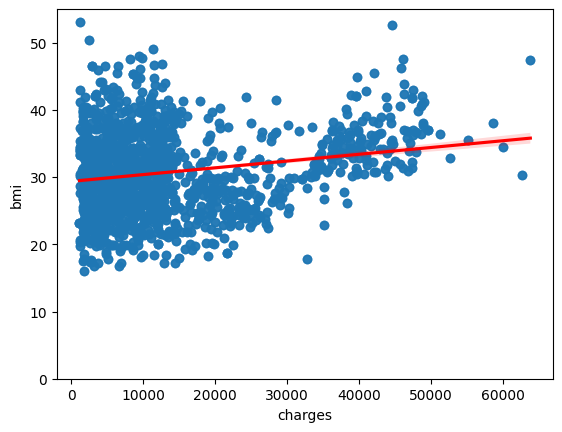

In [59]:
sns.regplot(x = "charges", y = "bmi", data=df, line_kws={"color":"red"})
plt.ylim(0, )

<Axes: xlabel='smoker', ylabel='charges'>

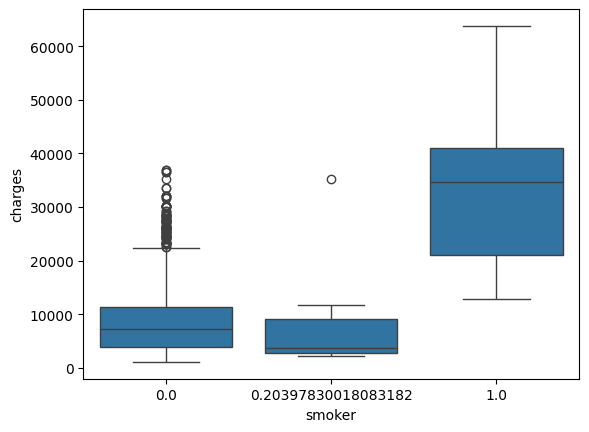

In [63]:
sns.boxplot(x="smoker", y="charges", data=df)

In [64]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026041,0.113045,0.037585,-0.023614,-0.007175,0.298622
gender,-0.026041,1.000000,0.042924,0.016020,0.082152,0.022213,0.062837
bmi,0.113045,0.042924,1.000000,-0.001492,0.010512,0.271119,0.199846
no_of_children,0.037585,0.016020,-0.001492,1.000000,0.006257,-0.025717,0.066442
smoker,-0.023614,0.082152,0.010512,0.006257,1.000000,0.053784,0.788620
region,-0.007175,0.022213,0.271119,-0.025717,0.053784,1.000000,0.054058
charges,0.298622,0.062837,0.199846,0.066442,0.788620,0.054058,1.000000


### **Model Development**
---

In [69]:
from sklearn.linear_model import LinearRegression

X = df[["smoker"]]
y = df["charges"]

lr = LinearRegression()

lr.fit(X, y)

print(lr.score(X, y))

0.6219213292445432


In [72]:
Z = df.drop(columns='charges')
y = df["charges"]

lr1 = LinearRegression()

lr1.fit(Z, y)

print(lr1.score(Z, y))

0.7505531512583368


In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(include_bias=False)),
    ("lr", LinearRegression())
])

pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('lr', LinearRegression())])

In [81]:
pipe.fit(Z, y)
pipe.score(Z, y)

0.8453054161564046

### **Model Refinement**
---

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42)

In [84]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.1)

rr.fit(X_train, y_train)
rr.score(X_test, y_test)

0.7391278739953587

In [89]:
pf = PolynomialFeatures(degree=2)

X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)

rr.fit(X_train_pf, y_train)
rr.score(X_test_pf, y_test)

0.8335846301659834